In [1]:
import pandas as pd

df = pd.read_csv('/content/insurance_new (1).csv')
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,1.0,27.900,0.0,0.0,16884.92400,0.0,0.0,0.0,1.0
1,18.0,0.0,33.770,1.0,1.0,1725.55230,0.0,0.0,1.0,0.0
2,28.0,0.0,33.000,3.0,1.0,4449.46200,0.0,0.0,1.0,0.0
3,33.0,0.0,22.705,0.0,1.0,21984.47061,0.0,1.0,0.0,0.0
4,32.0,0.0,28.880,0.0,1.0,3866.85520,0.0,1.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   float64
 1   sex               1337 non-null   float64
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   float64
 4   smoker            1337 non-null   float64
 5   charges           1337 non-null   float64
 6   region_northeast  1337 non-null   float64
 7   region_northwest  1337 non-null   float64
 8   region_southeast  1337 non-null   float64
 9   region_southwest  1337 non-null   float64
dtypes: float64(10)
memory usage: 104.7 KB


In [2]:
df.isnull().sum()

,0
age,1
sex,1
bmi,1
children,1
smoker,1
charges,1
region_northeast,1
region_northwest,1
region_southeast,1
region_southwest,1


In [3]:
df.dropna(inplace=True)

In [4]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
charges,0
region_northeast,0
region_northwest,0
region_southeast,0
region_southwest,0


In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
count,1336.000000,1336.00000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000
mean,39.205838,0.49476,30.664644,1.096557,0.795659,13267.248553,0.242515,0.242515,0.271707,0.243263
std,14.036933,0.50016,6.102597,1.205650,0.403370,12107.107658,0.428765,0.428765,0.445006,0.429214
min,18.000000,0.00000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.00000,26.272500,0.000000,1.000000,4744.325050,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.00000,30.400000,1.000000,1.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.00000,34.700000,2.000000,1.000000,16604.302645,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.00000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


In [7]:
df.drop(['charges'],axis=1,inplace=True)
df.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,1.0,27.900,0.0,0.0,0.0,0.0,0.0,1.0
1,18.0,0.0,33.770,1.0,1.0,0.0,0.0,1.0,0.0
2,28.0,0.0,33.000,3.0,1.0,0.0,0.0,1.0,0.0
3,33.0,0.0,22.705,0.0,1.0,0.0,1.0,0.0,0.0
4,32.0,0.0,28.880,0.0,1.0,0.0,1.0,0.0,0.0


#Data scaling

In [8]:
#mean(age,bmi,children)->39.2,30.7,1.1
#std(age,bmi,children).14.0,6.1,1.2
df['age']=(df['age']-39.2)/14.0
df['bmi']=(df['bmi']-30.7)/6.1
df['children']=(df['children']-1.1)/1.2
df.head()


,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.442857,1.0,-0.459016,-0.916667,0.0,0.0,0.0,0.0,1.0
1,-1.514286,0.0,0.503279,-0.083333,1.0,0.0,0.0,1.0,0.0
2,-0.800000,0.0,0.377049,1.583333,1.0,0.0,0.0,1.0,0.0
3,-0.442857,0.0,-1.310656,-0.916667,1.0,0.0,1.0,0.0,0.0
4,-0.514286,0.0,-0.298361,-0.916667,1.0,0.0,1.0,0.0,0.0


In [10]:
y =df['smoker']
x = df.drop(['smoker'],axis=1)

In [11]:
y.value_counts()

,count
smoker,
1.0,1063
0.0,273


In [12]:
x.head()

,age,sex,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.442857,1.0,-0.459016,-0.916667,0.0,0.0,0.0,1.0
1,-1.514286,0.0,0.503279,-0.083333,0.0,0.0,1.0,0.0
2,-0.800000,0.0,0.377049,1.583333,0.0,0.0,1.0,0.0
3,-0.442857,0.0,-1.310656,-0.916667,0.0,1.0,0.0,0.0
4,-0.514286,0.0,-0.298361,-0.916667,0.0,1.0,0.0,0.0


In [13]:
y.head()

,smoker
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0


#Splitting data

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(935, 8)
(401, 8)
(935,)
(401,)


In [16]:
y_train.head()

,smoker
397,1.0
300,1.0
1044,0.0
196,1.0
445,1.0


In [17]:
x_test.head(10)

,age,sex,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest
976,-0.942857,0.0,-0.254098,-0.083333,1.0,0.0,0.0,0.0
834,0.200000,0.0,0.863934,0.750000,0.0,0.0,0.0,1.0
305,-0.728571,0.0,0.433607,0.750000,0.0,1.0,0.0,0.0
124,0.557143,1.0,0.527049,1.583333,0.0,1.0,0.0,0.0
1305,-0.728571,1.0,-1.450820,-0.916667,0.0,1.0,0.0,0.0
1174,-1.228571,1.0,-0.590164,-0.916667,0.0,1.0,0.0,0.0
567,0.128571,0.0,-0.018033,0.750000,0.0,1.0,0.0,0.0
665,0.700000,0.0,-0.327869,-0.083333,0.0,1.0,0.0,0.0
271,0.771429,0.0,0.573770,0.750000,0.0,0.0,0.0,1.0
325,0.057143,0.0,0.558197,-0.083333,1.0,0.0,0.0,0.0


In [18]:
x_train.describe()

,age,sex,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.010390,0.497326,0.030179,-0.024510,0.228877,0.252406,0.279144,0.239572
std,1.011713,0.500260,1.020189,0.989679,0.420335,0.434626,0.448819,0.427051
min,-1.514286,0.000000,-2.276230,-0.916667,0.000000,0.000000,0.000000,0.000000
25%,-0.907143,0.000000,-0.687295,-0.916667,0.000000,0.000000,0.000000,0.000000
50%,-0.014286,0.000000,-0.032787,-0.083333,0.000000,0.000000,0.000000,0.000000
75%,0.914286,1.000000,0.698361,0.750000,0.000000,1.000000,1.000000,0.000000
max,1.771429,1.000000,3.677049,3.250000,1.000000,1.000000,1.000000,1.000000


#Building a model

In [19]:
#logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [20]:
y_pred =lr.predict(x_test)

In [21]:
y_test.value_counts()

,count
smoker,
1.0,320
0.0,81


In [22]:
#calculate the accuracy & precision & recall & f1-score & confusion matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
print('accuracy: ',accuracy_score(y_test,y_pred))
print('precision: ',precision_score(y_test,y_pred))
print('recall: ',recall_score(y_test,y_pred))
print('f1: ',f1_score(y_test,y_pred))
print('confusion matrix: ',confusion_matrix(y_test,y_pred))


accuracy:  0.7980049875311721
precision:  0.7980049875311721
recall:  1.0
f1:  0.8876560332871013
confusion matrix:  [[  0  81]
 [  0 320]]


In [23]:
#svm model
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)

y_pred = svm.predict(x_test)

print('accuracy: ',accuracy_score(y_test,y_pred))
print('precision: ',precision_score(y_test,y_pred))
print('recall: ',recall_score(y_test,y_pred))
print('f1: ',f1_score(y_test,y_pred))
print('confusion matrix: ',confusion_matrix(y_test,y_pred))

accuracy:  0.7980049875311721
precision:  0.7980049875311721
recall:  1.0
f1:  0.8876560332871013
confusion matrix:  [[  0  81]
 [  0 320]]


In [24]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train , y_train)

y_pred = knn.predict(x_test)

print('accuracy: ',accuracy_score(y_test,y_pred))
print('precision: ',precision_score(y_test,y_pred))
print('recall: ',recall_score(y_test,y_pred))
print('f1: ',f1_score(y_test,y_pred))
print('confusion matrix: ',confusion_matrix(y_test,y_pred))


accuracy:  0.7581047381546134
precision:  0.7957559681697612
recall:  0.9375
f1:  0.860832137733142
confusion matrix:  [[  4  77]
 [ 20 300]]


In [25]:
#DT model(Desision Tree)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train , y_train)

y_pred = dt.predict(x_test)

print('accuracy: ',accuracy_score(y_test,y_pred))
print('precision: ',precision_score(y_test,y_pred))
print('recall: ',recall_score(y_test,y_pred))
print('f1: ',f1_score(y_test,y_pred))
print('confusion matrix: ',confusion_matrix(y_test,y_pred))

accuracy:  0.6583541147132169
precision:  0.7886435331230284
recall:  0.78125
f1:  0.7849293563579278
confusion matrix:  [[ 14  67]
 [ 70 250]]


In [26]:
#RF model(Random Forest)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

print('accuracy: ',accuracy_score(y_test,y_pred))
print('precision: ',precision_score(y_test,y_pred))
print('recall: ',recall_score(y_test,y_pred))
print('f1: ',f1_score(y_test,y_pred))
print('confusion matrix: ',confusion_matrix(y_test,y_pred))

accuracy:  0.7481296758104738
precision:  0.7967479674796748
recall:  0.91875
f1:  0.8534107402031931
confusion matrix:  [[  6  75]
 [ 26 294]]


Feature importances (sorted):
Feature bmi: Importance 0.45770763410540416
Feature age: Importance 0.3545265625288112
Feature children: Importance 0.09698494565097122
Feature sex: Importance 0.03300126003337134
Feature region_southwest: Importance 0.015431475415390682
Feature region_northeast: Importance 0.014535284203213003
Feature region_southeast: Importance 0.014132659189207515
Feature region_northwest: Importance 0.013680178873630829


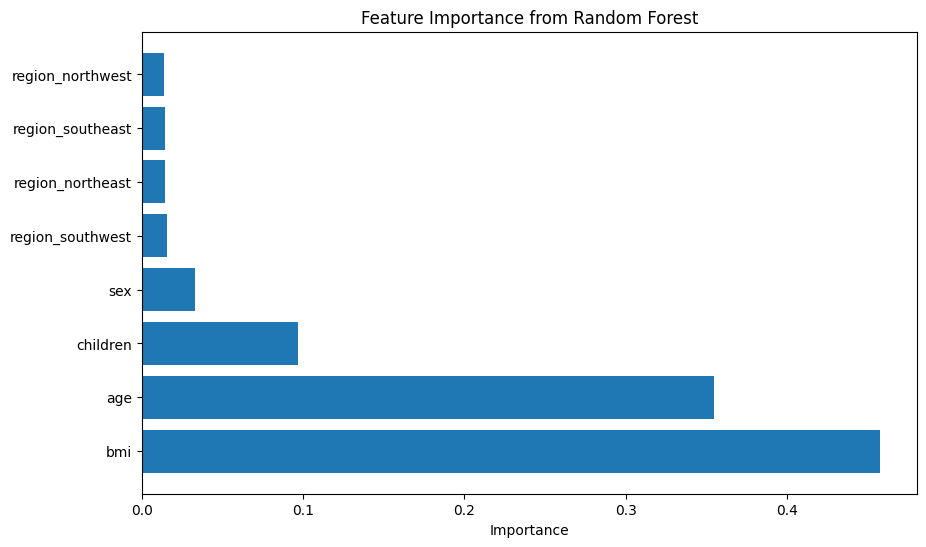

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Get the feature importance from the trained Random Forest model
importances = rf.feature_importances_

# Sort the feature importances in descending order
sorted_idx = np.argsort(importances)[::-1]

# Print the feature importances in descending order
print("Feature importances (sorted):")
for idx in sorted_idx:
    print(f"Feature {x_train.columns[idx]}: Importance {importances[idx]}")

# Optionally, plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance from Random Forest")
plt.barh(range(x_train.shape[1]), importances[sorted_idx], align="center")
plt.yticks(range(x_train.shape[1]), [f"{x_train.columns[i]}" for i in sorted_idx])
plt.xlabel("Importance")
plt.show()


In [28]:
#Tune svm
svm = SVC(C=1,gamma="auto",kernel="rbf")
svm.fit(x_train , y_train)

y_pred = svm.predict(x_test)

print(accuracy_score(y_test , y_pred))
print(precision_score(y_test , y_pred))
print(recall_score(y_test , y_pred))
print(f1_score(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))


0.7980049875311721
0.7980049875311721
1.0
0.8876560332871013
[[  0  81]
 [  0 320]]


In [29]:
#Saving a model
import pickle
pickle.dump(rf, open('model.pkl','wb'))